In [310]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [311]:
class Model(nn.Module):
  def __init__(self, in_features=4,h1=4,h2=4 ,out_fetures=4):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_fetures)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.out(x))
    return x
  torch.manual_seed(22)
model=Model()

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [313]:
url='https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv'
df=pd.read_csv(url)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [314]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [315]:
df['target']=df['target'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.tail()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## train and split the data sets

In [316]:
x=df.drop('target',axis=1)
y=df['target']
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [317]:
y.tail()

,target
145,2
146,2
147,2
148,2
149,2


## change X and Y to arrays

In [318]:
x=x.values
y=y.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [319]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train test split

In [320]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [321]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=4, bias=True)
)>

In [322]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  print(f'epoch:{i} and loss:{loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch:0 and loss:1.351530909538269
epoch:1 and loss:1.3259384632110596
epoch:2 and loss:1.3066939115524292
epoch:3 and loss:1.2934467792510986
epoch:4 and loss:1.2842756509780884
epoch:5 and loss:1.2812449932098389
epoch:6 and loss:1.2800300121307373
epoch:7 and loss:1.2793971300125122
epoch:8 and loss:1.2788091897964478
epoch:9 and loss:1.2777438163757324
epoch:10 and loss:1.2758537530899048
epoch:11 and loss:1.2730106115341187
epoch:12 and loss:1.2692818641662598
epoch:13 and loss:1.2648664712905884
epoch:14 and loss:1.2600209712982178
epoch:15 and loss:1.254992961883545
epoch:16 and loss:1.2499743700027466
epoch:17 and loss:1.2452024221420288
epoch:18 and loss:1.240744948387146
epoch:19 and loss:1.2371431589126587
epoch:20 and loss:1.2350311279296875
epoch:21 and loss:1.233064889907837
epoch:22 and loss:1.2309755086898804
epoch:23 and loss:1.2286566495895386
epoch:24 and loss:1.2262831926345825
epoch:25 and loss:1.2240792512893677
epoch:26 and loss:1.2221949100494385
epoch:27 and lo

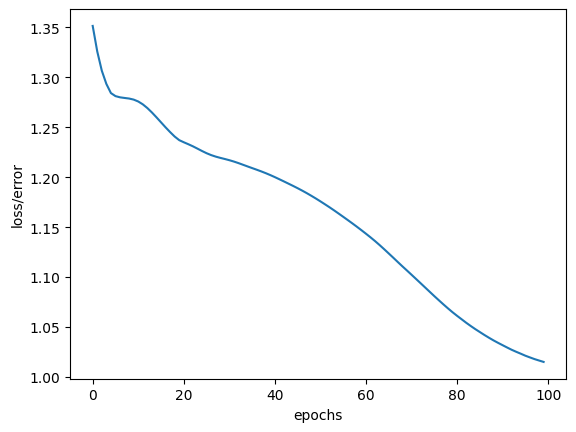

In [323]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')
plt.show()

In [324]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)
  print(loss)

tensor(0.9556)


In [325]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):

    y_eval=model.forward(data)
    print(f'{i+1}.) {str(y_eval)}\t {y_test[i]}\t {y_eval.argmax().item()}')
    if y_eval.argmax().item()==y_test[i]:
     correct+=1

  print(f'we goat:{correct}')



1.) tensor([0.0000, 0.0000, 0.0939, 0.0000])	 1	 2
2.) tensor([0., 0., 0., 0.])	 0	 0
3.) tensor([0.0000, 0.0000, 6.6518, 0.0000])	 2	 2
4.) tensor([0.0000, 0.0000, 0.4121, 0.0000])	 1	 2
5.) tensor([0.0000, 0.0000, 0.2199, 0.0000])	 1	 2
6.) tensor([0., 0., 0., 0.])	 0	 0
7.) tensor([0., 0., 0., 0.])	 1	 0
8.) tensor([0.0000, 0.0000, 2.7171, 0.0000])	 2	 2
9.) tensor([0.0000, 0.0000, 1.4202, 0.0000])	 1	 2
10.) tensor([0., 0., 0., 0.])	 1	 0
11.) tensor([0.0000, 0.0000, 2.0881, 0.0000])	 2	 2
12.) tensor([0., 0., 0., 0.])	 0	 0
13.) tensor([0., 0., 0., 0.])	 0	 0
14.) tensor([0., 0., 0., 0.])	 0	 0
15.) tensor([0., 0., 0., 0.])	 0	 0
16.) tensor([0.0000, 0.0000, 0.1582, 0.0000])	 1	 2
17.) tensor([0.0000, 0.0000, 4.4561, 0.0000])	 2	 2
18.) tensor([0., 0., 0., 0.])	 1	 0
19.) tensor([0.0000, 0.0000, 0.3060, 0.0000])	 1	 2
20.) tensor([0.0000, 0.0000, 4.4630, 0.0000])	 2	 2
21.) tensor([0., 0., 0., 0.])	 0	 0
22.) tensor([0.0000, 0.0000, 1.8190, 0.0000])	 2	 2
23.) tensor([0., 0., 0., 

## test nn model

In [326]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([0., 0., 0., 0.])


In [327]:
newer_iris=torch.tensor([5.9,3.0,5.1,1.1])
with torch.no_grad():
  print(model(newer_iris))

tensor([0.0000, 0.0000, 0.5078, 0.0000])


## save the model

In [328]:
torch.save(model.state_dict(),'Iris_pytoch.pt')

## load the model

In [329]:
new_model=Model()
new_model.load_state_dict(torch.load('Iris_pytoch.pt'))

<All keys matched successfully>

In [330]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=4, bias=True)
)